## Hierarchial methods

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sns

import sklearn
import sklearn.metrics as sm

In [2]:
from sklearn.cluster import AgglomerativeClustering

import scipy
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

In [4]:
np.set_printoptions(precision=4, suppress=True)
plt.figure(figsize=(10, 3))
%matplotlib inline
sns.set_style("whitegrid")

<Figure size 1000x300 with 0 Axes>

In [38]:
# address = '/workspaces/python-for-data-science-and-machine-learning-essential-training-part-2-3016934/data/mtcars.csv'
address = '../data/mtcars.csv'

cars = pd.read_csv(address)
cars.columns = ['car_names','mpg','cyl','disp','hp','drat','wt','qsec','vs','am','gear','carb']

X = cars[['mpg','disp','hp','wt']].values

y = cars.iloc[:,(9)].values


### Using scipy to generate dendrograms

In [45]:
Z = linkage(X, 'ward')

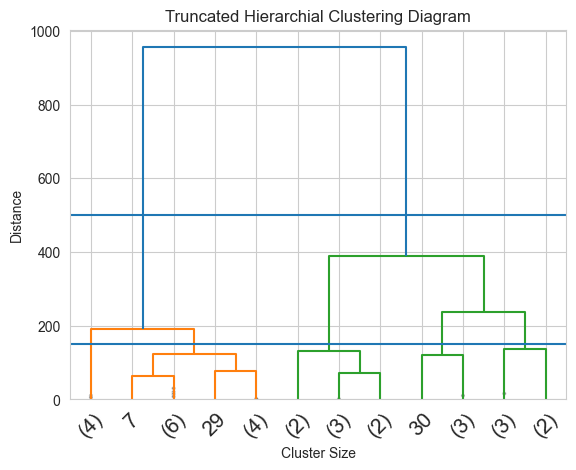

In [46]:
dendrogram(Z, truncate_mode='lastp', p=12, leaf_rotation=45., leaf_font_size=15, show_contracted=True)

plt.title('Truncated Hierarchial Clustering Diagram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')

plt.axhline(y=500)
plt.axhline(y=150)
# plt.axhline(y=100)
plt.show()

### Generating hierarchical clusters

In [42]:
k=2

Hclustering = AgglomerativeClustering(n_clusters=k, metric='euclidean', linkage='ward')
Hclustering.fit(X)

sm.accuracy_score(y, Hclustering.labels_)

0.78125

In [29]:
Hclustering = AgglomerativeClustering(n_clusters=k, metric='euclidean', linkage='average')
Hclustering.fit(X)

sm.accuracy_score(y, Hclustering.labels_)

0.78125

In [30]:
Hclustering = AgglomerativeClustering(n_clusters=k, metric='manhattan', linkage='average')
Hclustering.fit(X)

sm.accuracy_score(y, Hclustering.labels_)

0.71875

'manhattan' does not work with 'ward'